In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [201]:
data = pd.read_csv('contest_train.csv')
data_withTarget = data.drop('ID', axis=1)

In [202]:
data.head(10)

,ID,TARGET,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,...,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259
0,1053371037,1,2.0,2.0,0.0,0.0,0.0,0.0,0.0,-114.527812,...,39.0,2.0,223.118594,290.015143,1.0,1.0,0.0,1.0,2.0,2.0
1,76507184,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,329.828334,...,25.0,82.0,479.616045,611.651594,0.0,1.0,0.0,1.0,1.0,1.0
2,76753690,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.427338,...,119.0,0.0,352.268014,564.573421,1.0,1.0,0.0,1.0,1.0,1.0
3,1026167358,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,23.621397,...,1.0,0.0,410.524985,421.653876,1.0,0.0,0.0,1.0,2.0,2.0
4,7220095746,0,4.0,3.0,1.0,0.0,1.0,0.0,0.0,677.745861,...,21.0,0.0,439.171356,476.189288,1.0,1.0,0.0,1.0,1.0,1.0
5,749968119,0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,128.431665,...,556.0,0.0,375.621695,932.860692,0.0,1.0,0.0,1.0,1.0,1.0
6,732725831,0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.752364,...,0.0,0.0,129.145079,303.977701,0.0,0.0,0.0,1.0,1.0,1.0
7,759016760,1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,4.447761,...,0.0,0.0,64.911715,34.302918,1.0,1.0,0.0,2.0,1.0,1.0
8,751161303,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,5.417075,...,0.0,0.0,80.210036,57.926346,1.0,1.0,0.0,1.0,1.0,1.0
9,749692335,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1059.073032,...,381.0,0.0,555.782352,1009.274610,0.0,1.0,0.0,1.0,1.0,1.0


In [203]:
data.tail(10)

,ID,TARGET,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,...,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259
24511,1153773140,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.917968,...,40.0,7.0,394.864160,452.563905,1.0,1.0,0.0,1.0,1.0,1.0
24512,1153583966,1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,-21.272219,...,0.0,0.0,269.266823,315.769647,0.0,0.0,0.0,1.0,1.0,1.0
24513,1154126657,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.957419,...,0.0,0.0,202.006250,86.502007,0.0,0.0,0.0,1.0,1.0,1.0
24514,1152299925,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-6.214768,...,8.0,0.0,302.734610,332.459091,1.0,1.0,0.0,1.0,2.0,1.0
24515,1130364587,1,5.0,1.0,0.0,0.0,0.0,0.0,0.0,46.421244,...,0.0,0.0,323.340590,293.117032,1.0,1.0,0.0,1.0,1.0,1.0
24516,1152298722,1,7.0,2.0,0.0,0.0,0.0,0.0,0.0,-36.555841,...,35.0,0.0,439.424027,431.111705,0.0,0.0,0.0,1.0,1.0,1.0
24517,1154036659,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-8.589135,...,52.0,0.0,355.145856,410.288394,1.0,1.0,0.0,2.0,1.0,2.0
24518,1152393779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.095346,...,0.0,0.0,110.133312,115.087534,0.0,0.0,0.0,1.0,1.0,1.0
24519,1153761763,1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,-14.182606,...,0.0,0.0,514.319183,583.248265,1.0,0.0,0.0,1.0,2.0,1.0
24520,1153760355,0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,-9.308210,...,18.0,2.0,606.348149,1020.831443,1.0,1.0,0.0,1.0,2.0,1.0


In [204]:
data.shape

(24521, 262)

In [205]:
data.ID.unique().shape # Проверяем, что все пользователи уникальны
                       # и среди них нет повторяющихся 

(24521,)

In [206]:
target = data.TARGET # отделяем целевую переменную от 
                     # всей выборки
data.drop('TARGET', axis=1, inplace=True)

In [207]:
data.isnull().any().any() # Смотрим на пропуски в данных

True

In [208]:
zero = data.isnull().sum() # Смотрим, где именно пропуски и 
zero[zero != 0]/data.shape[0]  # какова их доля от всей выборки

FEATURE_8      0.046654
FEATURE_12     0.000816
FEATURE_71     0.120713
FEATURE_72     0.113413
FEATURE_73     0.120713
FEATURE_123    0.011541
FEATURE_124    0.011541
FEATURE_125    0.011541
FEATURE_126    0.011541
FEATURE_127    0.011541
FEATURE_128    0.011541
FEATURE_129    0.011541
FEATURE_130    0.011541
FEATURE_131    0.011541
FEATURE_132    0.011541
FEATURE_133    0.011541
FEATURE_134    0.011541
FEATURE_135    0.011541
FEATURE_136    0.011541
FEATURE_137    0.011541
FEATURE_138    0.011541
FEATURE_149    0.098609
FEATURE_150    0.098609
FEATURE_151    0.098609
FEATURE_152    0.098609
FEATURE_153    0.098609
FEATURE_162    0.025774
FEATURE_173    0.001101
FEATURE_174    0.001101
FEATURE_175    0.004690
FEATURE_181    0.004894
FEATURE_183    0.000041
FEATURE_187    0.484401
FEATURE_188    0.043391
FEATURE_189    0.986746
FEATURE_190    0.701113
FEATURE_191    0.624322
FEATURE_192    0.532605
FEATURE_193    0.513682
FEATURE_194    0.703275
FEATURE_195    0.113658
FEATURE_196    0

### Посмотрим на распределение тех данных, у которых процент пропуска больше 40%

/home/nikstep/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nikstep/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, '194')

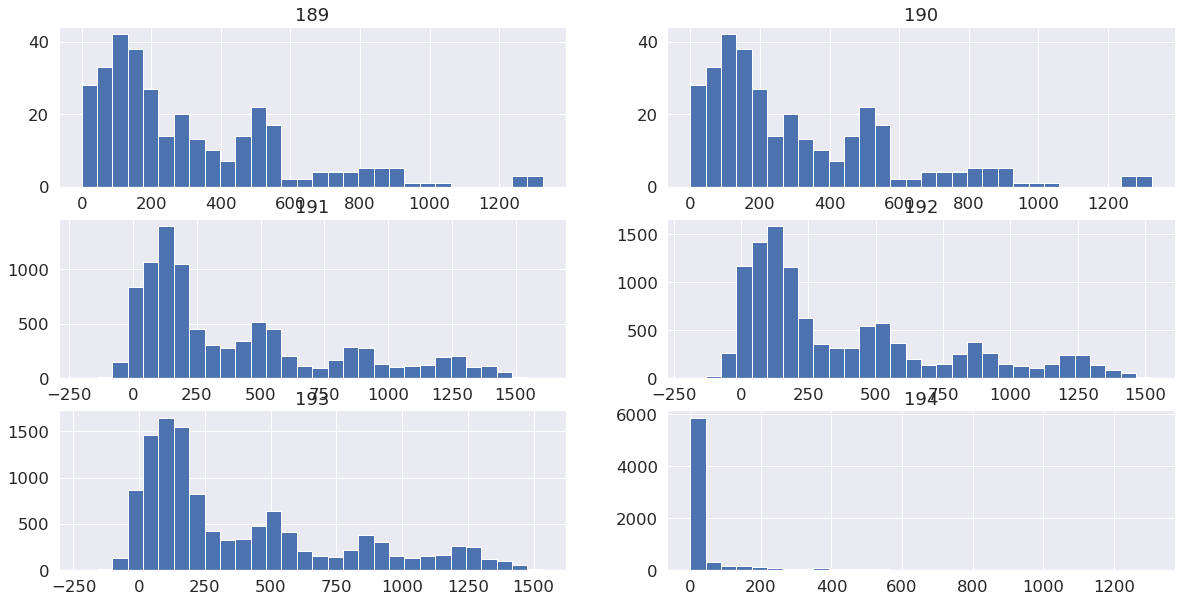

In [209]:
# data.FEATURE_194
# data.FEATURE_193
# data.FEATURE_192
# data.FEATURE_191
# data.FEATURE_190
# data.FEATURE_189


plt.figure(figsize=[20, 10])
plt.subplot(3, 2, 1)
plt.hist(data.FEATURE_189, bins=30)
plt.title('189')

plt.subplot(3, 2, 2)
plt.hist(data.FEATURE_189, bins=30)
plt.title('190')

plt.subplot(3, 2, 3)
plt.hist(data.FEATURE_191, bins=30)
plt.title('191')

plt.subplot(3, 2, 4)
plt.hist(data.FEATURE_192, bins=30)
plt.title('192')

plt.subplot(3, 2, 5)
plt.hist(data.FEATURE_193, bins=30)
plt.title('193')

plt.subplot(3, 2, 6)
plt.hist(data.FEATURE_194, bins=30)
plt.title('194')

### Исходя из этих распределений все фичи, кроме 194 заполним медианным значением. А 194 фичи заполним 0

In [210]:
data.FEATURE_194.fillna(0, inplace=True)
data.FEATURE_193.fillna(data.FEATURE_193.median(), inplace=True)
data.FEATURE_192.fillna(data.FEATURE_192.median(), inplace=True)
data.FEATURE_191.fillna(data.FEATURE_191.median(), inplace=True)
data.FEATURE_190.fillna(data.FEATURE_190.median(), inplace=True)
data.FEATURE_189.fillna(data.FEATURE_189.median(), inplace=True)

### Посмотрим на распределение тех данных, у которых процент пропуска больше 5%, но меньше 40%

Text(0.5, 1.0, '153')

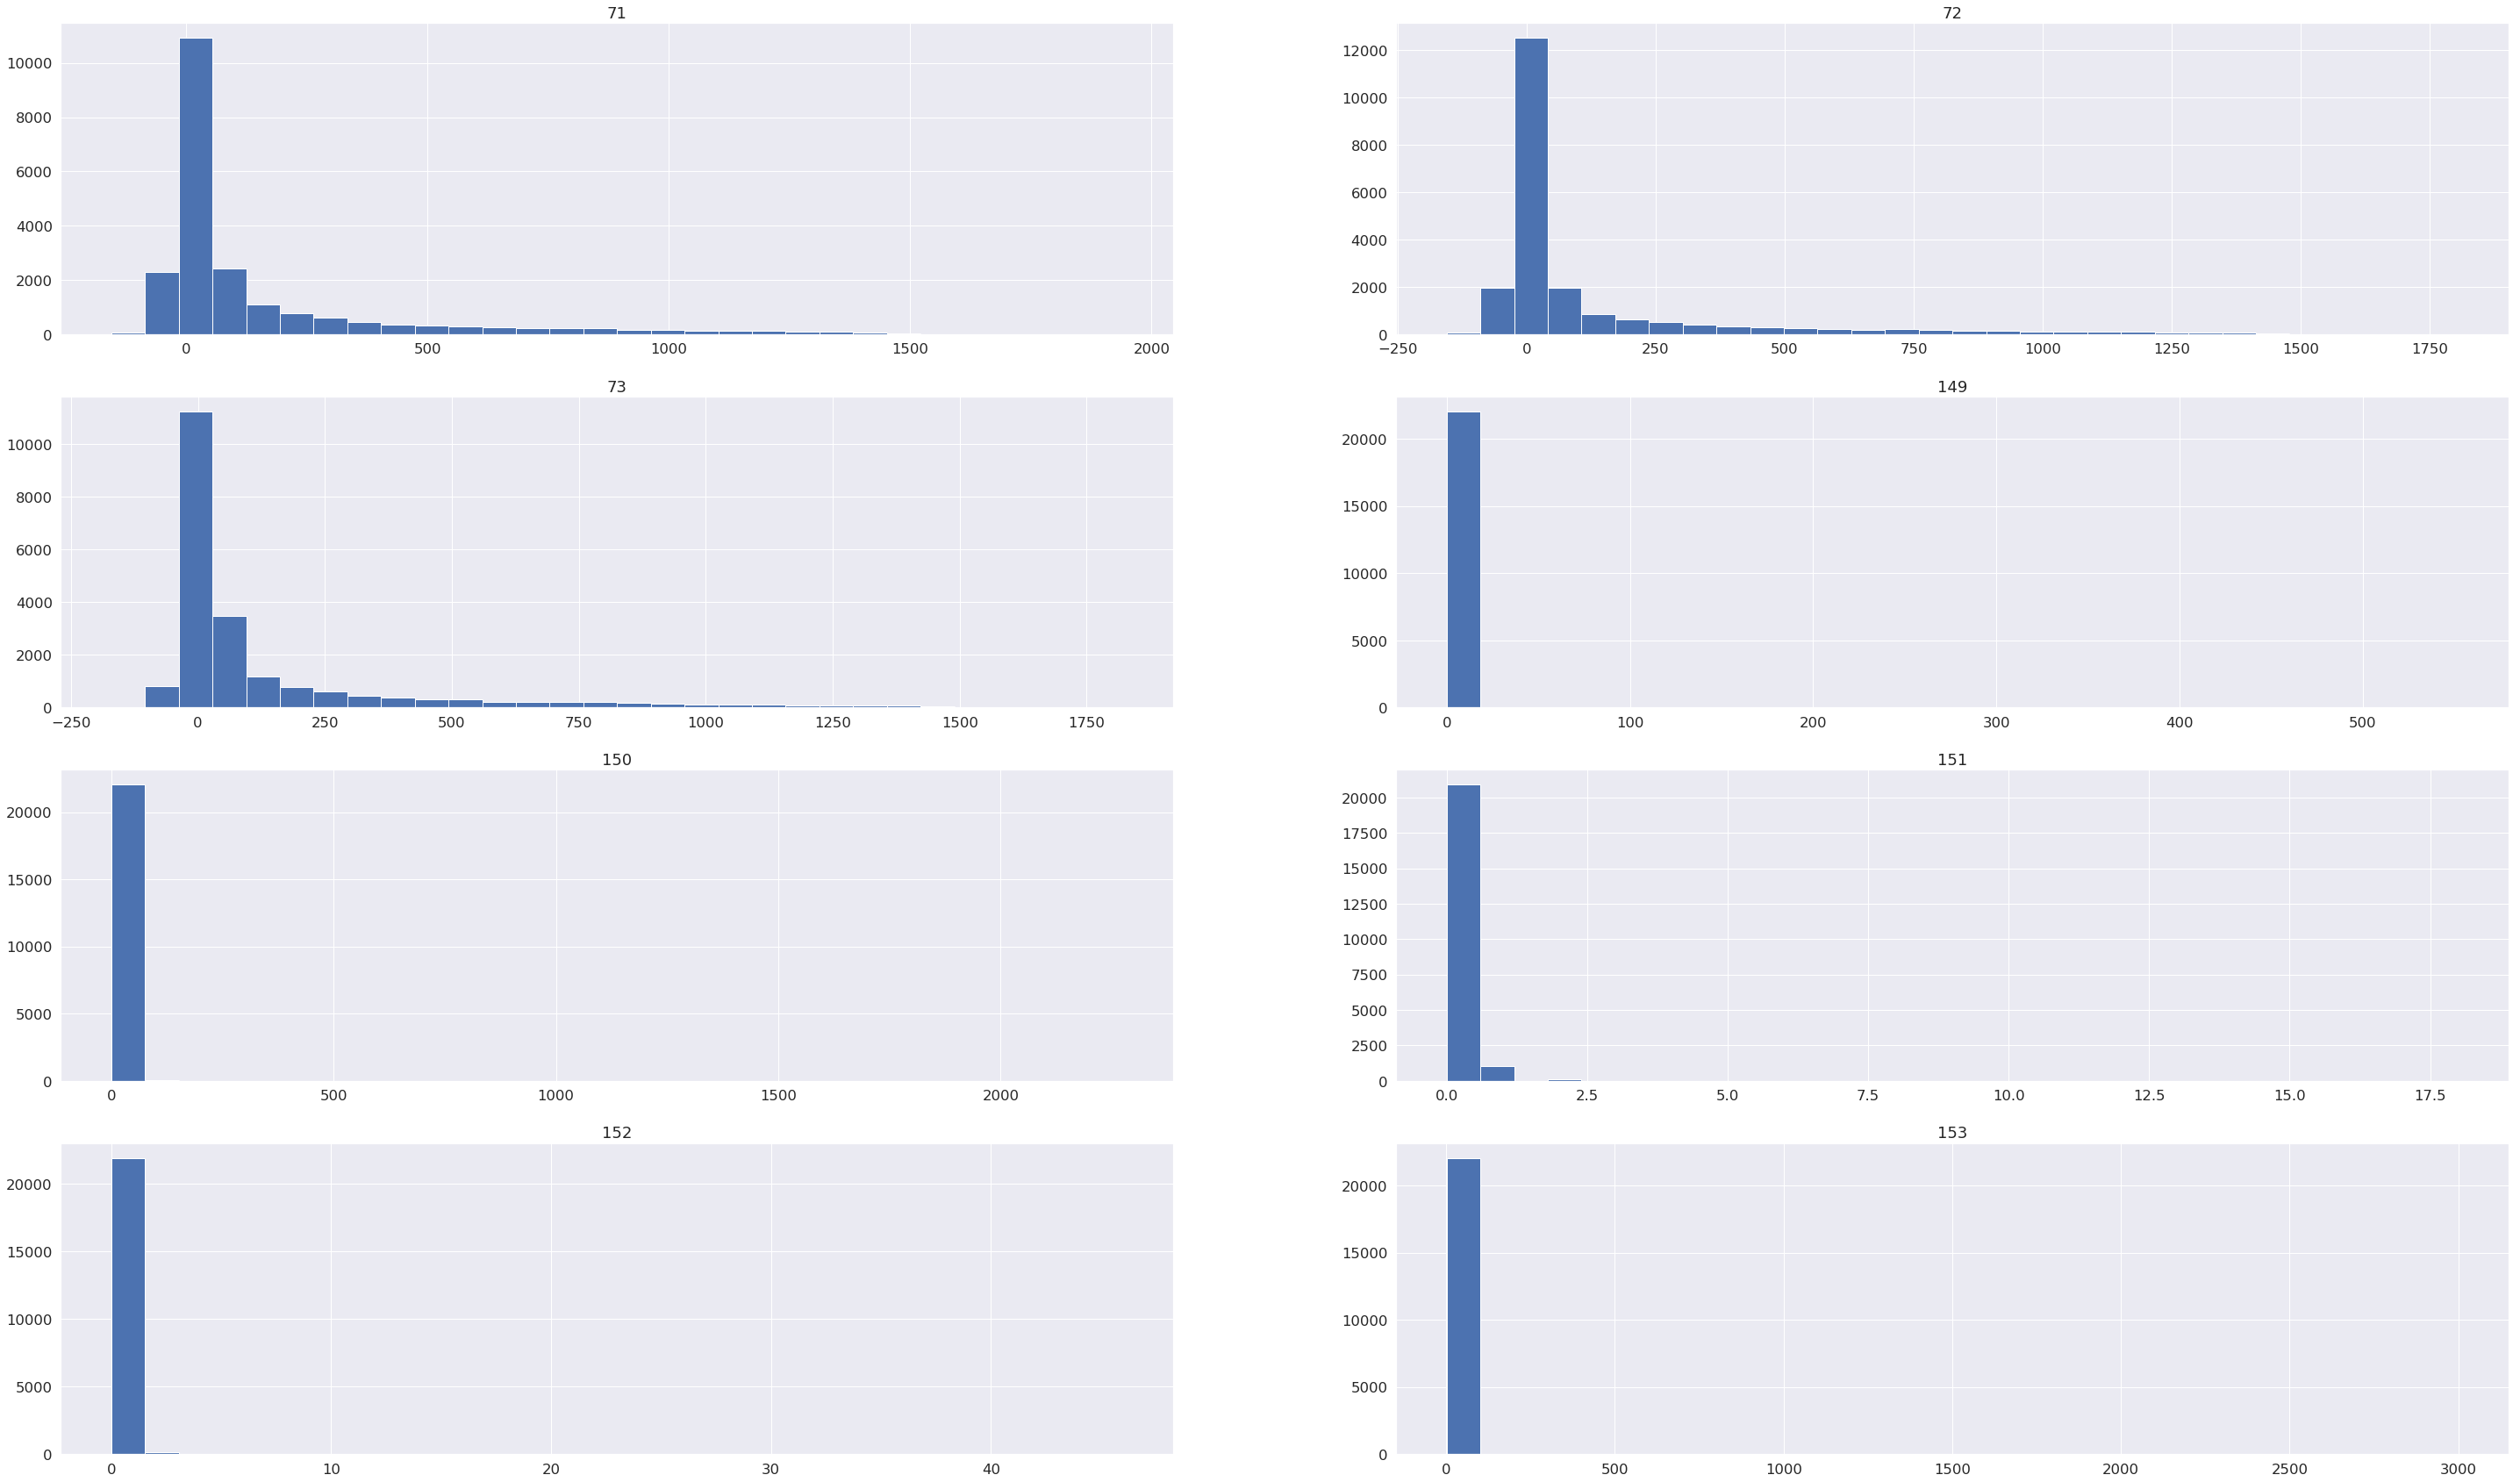

In [211]:
plt.figure(figsize=[50, 30])
plt.subplot(4, 2, 1)
plt.hist(data.FEATURE_71, bins=30)
plt.title('71')

plt.subplot(4, 2, 2)
plt.hist(data.FEATURE_72, bins=30)
plt.title('72')

plt.subplot(4, 2, 3)
plt.hist(data.FEATURE_73, bins=30)
plt.title('73')

plt.subplot(4, 2, 4)
plt.hist(data.FEATURE_149, bins=30)
plt.title('149')

plt.subplot(4, 2, 5)
plt.hist(data.FEATURE_150, bins=30)
plt.title('150')

plt.subplot(4, 2, 6)
plt.hist(data.FEATURE_151, bins=30)
plt.title('151')

plt.subplot(4, 2, 7)
plt.hist(data.FEATURE_152, bins=30)
plt.title('152')

plt.subplot(4, 2, 8)
plt.hist(data.FEATURE_153, bins=30)
plt.title('153')

### Все фичи, в данном диапазоне, заполним таким образом: с 149 и след. присвоем 0; 71,72,73 - median

In [212]:
data.FEATURE_71.fillna(data.FEATURE_71.median(), inplace=True)
data.FEATURE_72.fillna(data.FEATURE_72.median(), inplace=True)
data.FEATURE_73.fillna(data.FEATURE_73.median(), inplace=True)
data.FEATURE_149.fillna(0, inplace=True)
data.FEATURE_150.fillna(0, inplace=True)
data.FEATURE_151.fillna(0, inplace=True)
data.FEATURE_152.fillna(0, inplace=True)
data.FEATURE_153.fillna(0, inplace=True)

### Остальные пропуски заполним средним значением (меньше 5% пропуска)

In [213]:
data.fillna(data.mean(), inplace=True)

In [214]:
data.isnull().any().any()

False

## Посмотрим на корреляцию данных, чтобы отбросить несущественные признаки

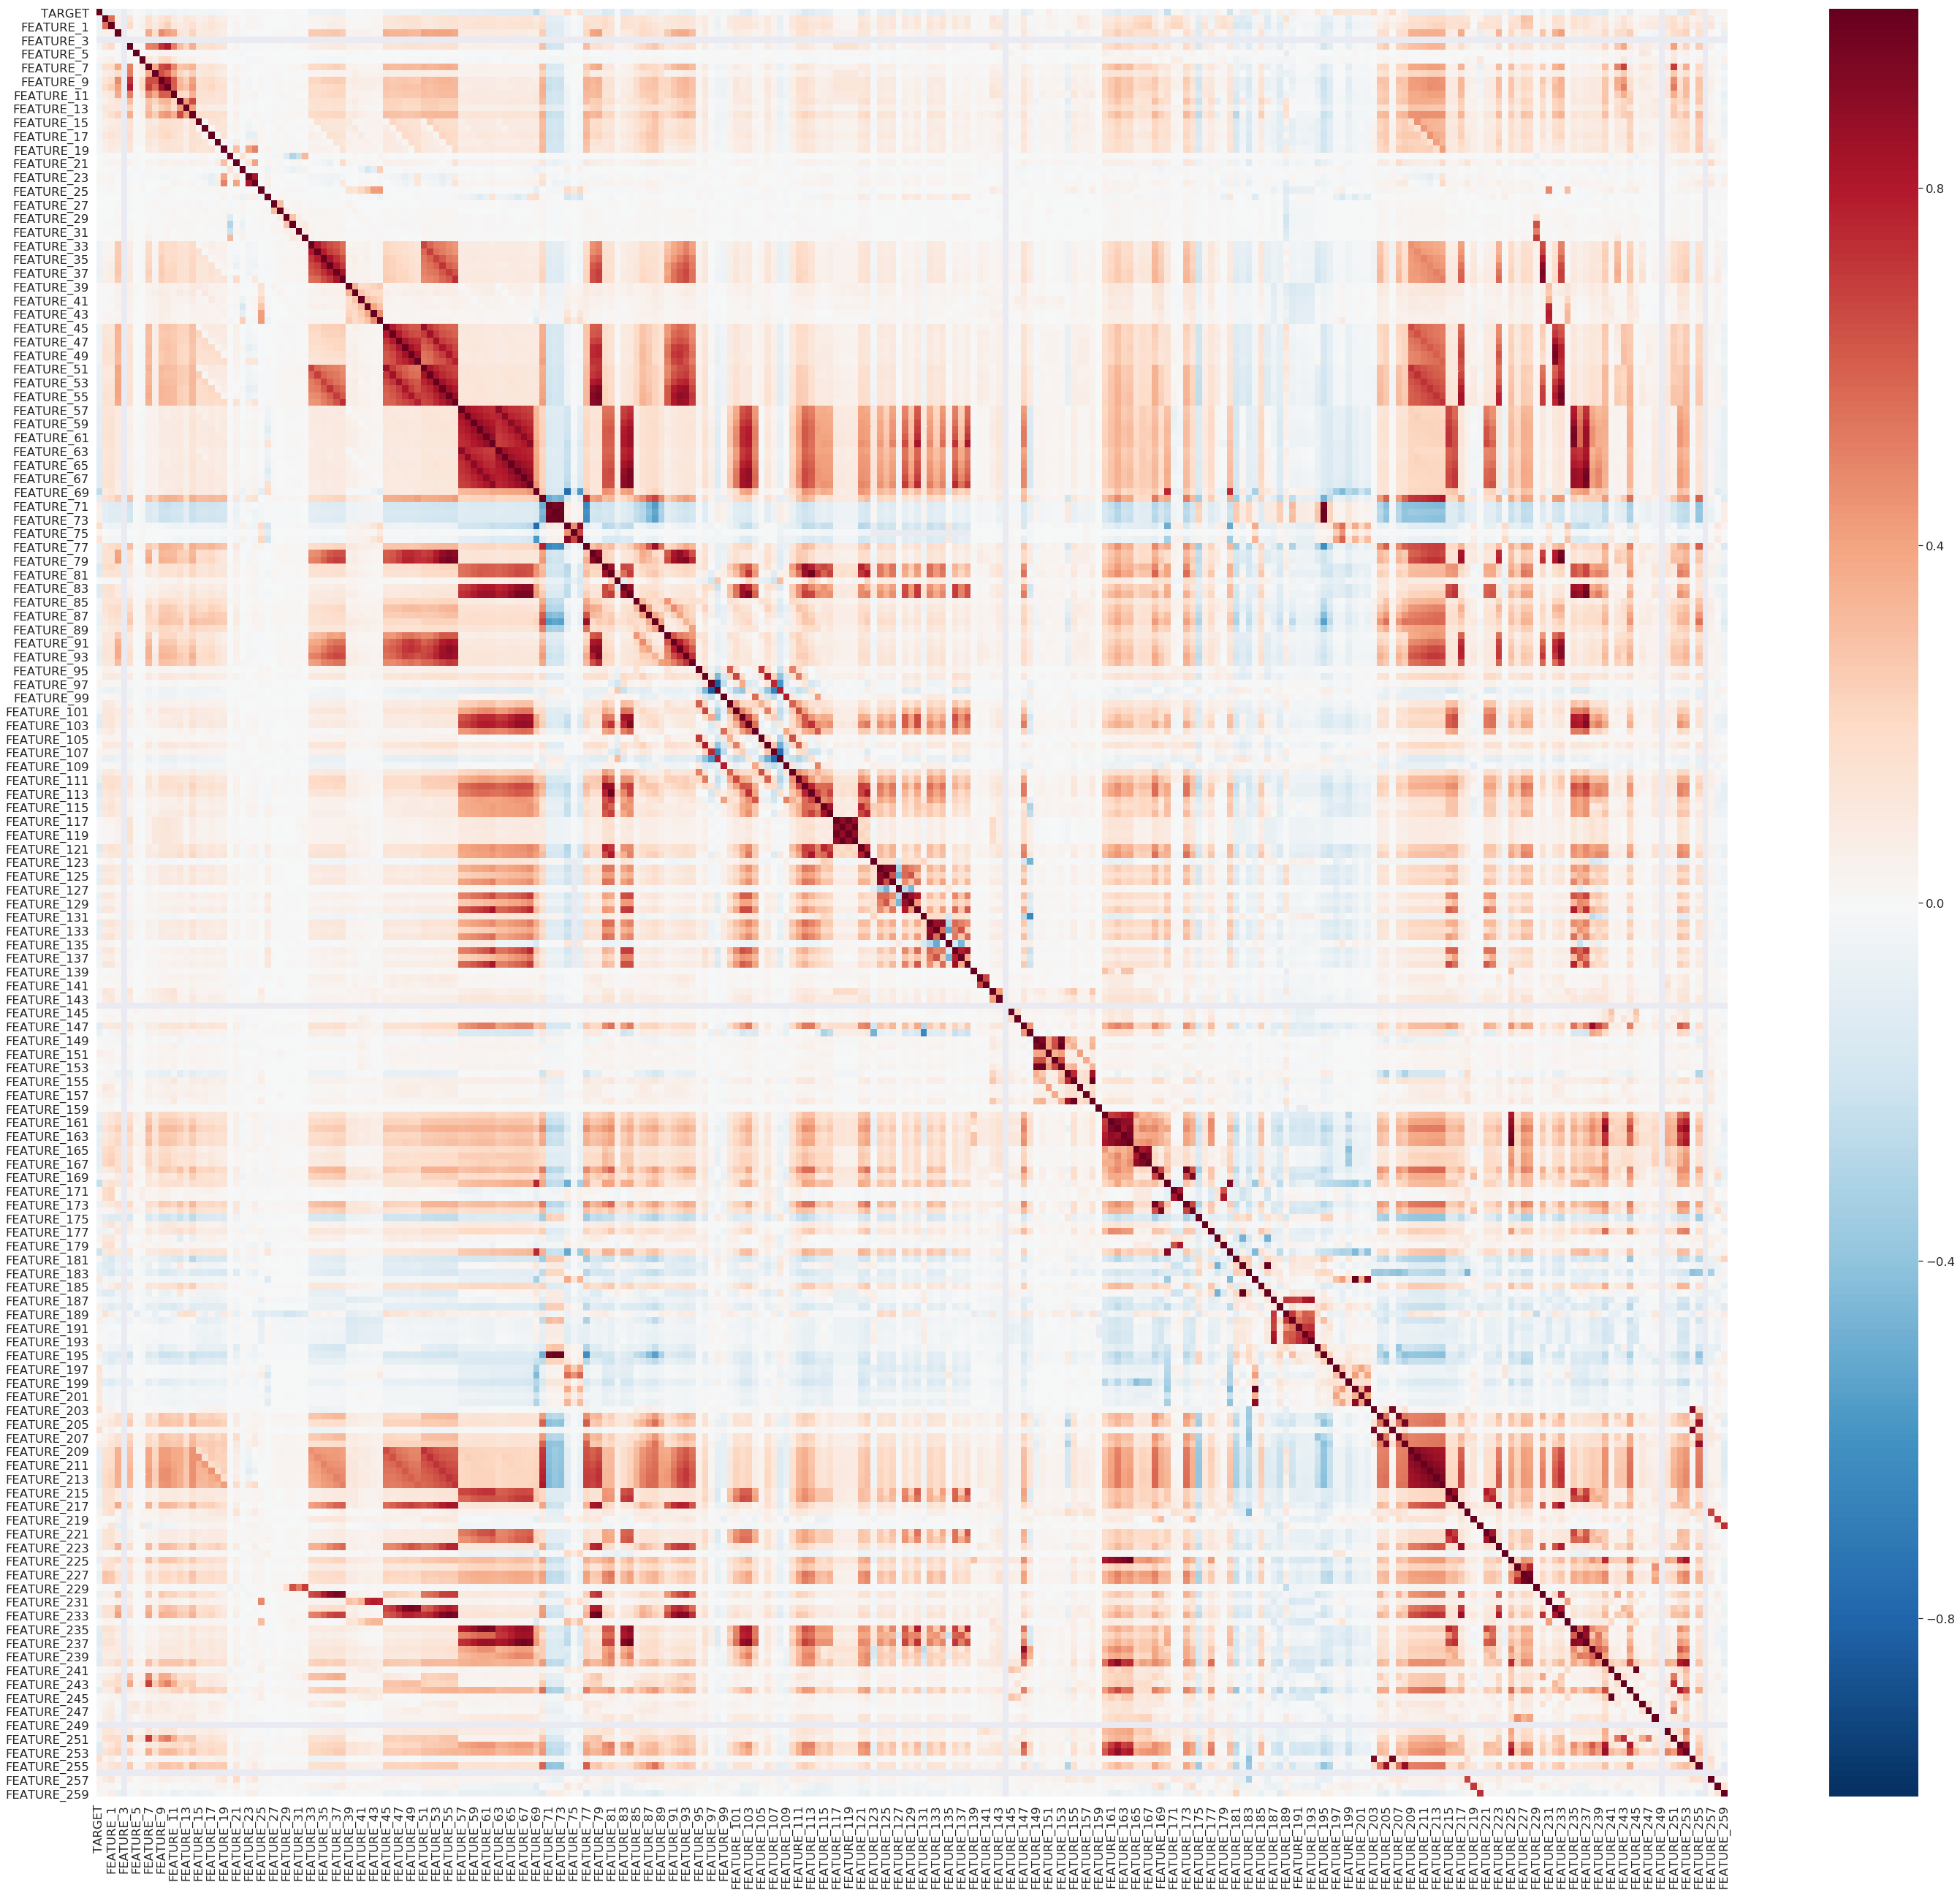

In [215]:
plt.figure(figsize=(50, 45))
ax = sns.heatmap(data_withTarget.corr(), cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0)

In [216]:
corr_TARGET = data_dum.corrwith(data_withTarget.TARGET)
corr = abs(corr_TARGET).sort_values()
print(corr)

FEATURE_27     0.000084
FEATURE_141    0.000626
FEATURE_20     0.000697
FEATURE_30     0.000717
FEATURE_140    0.000736
FEATURE_158    0.001369
FEATURE_241    0.001848
FEATURE_245    0.001854
FEATURE_96     0.001988
FEATURE_29     0.002012
FEATURE_106    0.002195
FEATURE_5      0.002215
FEATURE_95     0.002299
FEATURE_105    0.002343
FEATURE_145    0.002522
FEATURE_82     0.002708
FEATURE_146    0.002739
FEATURE_25     0.003134
FEATURE_248    0.003386
FEATURE_32     0.003863
FEATURE_22     0.003907
FEATURE_179    0.003930
FEATURE_229    0.003981
FEATURE_155    0.004606
FEATURE_31     0.004650
FEATURE_28     0.005221
FEATURE_189    0.005663
FEATURE_21     0.005664
FEATURE_159    0.005866
FEATURE_234    0.005982
                 ...   
FEATURE_199    0.120759
FEATURE_68     0.120878
FEATURE_103    0.120916
FEATURE_64     0.122601
FEATURE_65     0.122853
FEATURE_113    0.122909
FEATURE_237    0.123406
FEATURE_198    0.123480
FEATURE_240    0.125530
FEATURE_83     0.126291
FEATURE_253    0

In [217]:
# Посмотрим отдельно на следующие фичи, так там получили значение NaN
print(data.FEATURE_3.unique())           
print(data.FEATURE_144.unique())         
print(data.FEATURE_249.unique())        
print(data.FEATURE_256.unique()) 

[0.]
[0.]
[0.]
[0.]


In [218]:
# Удалим их, так как везде у них значение 0 (оставим один)
data.drop('FEATURE_144', axis=1, inplace=True)
data.drop('FEATURE_249', axis=1, inplace=True)
data.drop('FEATURE_256', axis=1, inplace=True)

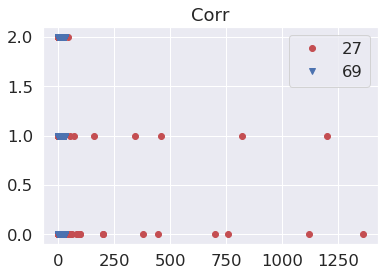

In [219]:
plt.plot(data_withTarget.FEATURE_27, data_withTarget.TARGET, linestyle='none', marker='o', c = 'r', label = '27')
plt.plot(data_withTarget.FEATURE_69, data_withTarget.TARGET, linestyle='none', marker='v', c = 'b',label = '69')
plt.title('Corr')
plt.legend()
plt.show()

In [220]:
### Удалим те данные, у которых корреляция меньше 0.2%
print(corr[corr < 0.002])

FEATURE_27     0.000084
FEATURE_141    0.000626
FEATURE_20     0.000697
FEATURE_30     0.000717
FEATURE_140    0.000736
FEATURE_158    0.001369
FEATURE_241    0.001848
FEATURE_245    0.001854
FEATURE_96     0.001988
dtype: float64


In [221]:
data.drop('FEATURE_27', axis=1, inplace=True)
data.drop('FEATURE_141', axis=1, inplace=True)
data.drop('FEATURE_20', axis=1, inplace=True)
data.drop('FEATURE_30', axis=1, inplace=True)
data.drop('FEATURE_140', axis=1, inplace=True)
data.drop('FEATURE_158', axis=1, inplace=True)
data.drop('FEATURE_241', axis=1, inplace=True)
data.drop('FEATURE_245', axis=1, inplace=True)
data.drop('FEATURE_96', axis=1, inplace=True)

## Обучим нашу модель, с помощью алгоритмов, которые не требуют нормировку данных: Градиентный бустинг, случайный лес и бэгинг

In [165]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [152]:
d = int(data.shape[1]**0.5) # Кол-во признаков на которых обучаемся

In [168]:
X_train, X_val, y_train, y_val = train_test_split(data.drop('ID', axis=1), target, test_size=0.2, random_state=4)

In [169]:
clf_gbc = GradientBoostingClassifier(n_estimators=200, random_state=1, max_features=d)
clf_gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=15, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [170]:
print('f1_score на Градиентном бустинге: ', f1_score(y_val, clf_gbc.predict(X_val),average='macro'))

f1_score на Градиентном бустинге:  0.47115390397298995


In [174]:
clf_forest = RandomForestClassifier(n_estimators = 200, max_features=d)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [175]:
print('f1_score на Случайном лесе: ', f1_score(y_val, clf_forest.predict(X_val),average='macro'))

f1_score на Случайном лесе:  0.3878511235766475


In [176]:
clf_bagging_random_DTC = BaggingClassifier(tree.DecisionTreeClassifier(max_features=d),  n_estimators = 200)
clf_bagging_random_DTC.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=200, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [177]:
print('f1_score на Бэгинге: ', f1_score(y_val, clf_bagging_random_DTC.predict(X_val),average='macro'))

f1_score на Бэгинге:  0.39761475199423874


# Работаем со всеми данными и делаем предсказания

In [222]:
dataP = pd.read_csv('contest_test.csv')

In [223]:
dataP.head(5)

,ID,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,...,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259
0,1154270440,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-46.950807,-45.018511,...,0.0,0.0,190.587701,162.047775,1.0,0.0,1.0,1.0,1.0,1.0
1,1147987574,0.0,0.0,1.0,0.0,0.0,0.0,0.0,343.627489,NaN,...,5.0,109.0,594.572663,685.500149,1.0,1.0,0.0,1.0,1.0,2.0
2,1129622364,0.0,0.0,0.0,0.0,1.0,0.0,0.0,909.178045,3260.445427,...,0.0,297.0,10.214396,300.397949,0.0,0.0,0.0,1.0,1.0,1.0
3,619797496,6.0,2.0,0.0,0.0,0.0,0.0,0.0,-4.499021,-93.374738,...,1.0,2.0,334.873280,363.739214,1.0,1.0,1.0,2.0,2.0,1.0
4,7391484886,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-23.189787,-35.810318,...,83.0,136.0,551.413748,769.830050,1.0,1.0,0.0,1.0,1.0,1.0


In [226]:
dataP.FEATURE_194.fillna(0, inplace=True)
dataP.FEATURE_193.fillna(dataP.FEATURE_193.median(), inplace=True)
dataP.FEATURE_192.fillna(dataP.FEATURE_192.median(), inplace=True)
dataP.FEATURE_191.fillna(dataP.FEATURE_191.median(), inplace=True)
dataP.FEATURE_190.fillna(dataP.FEATURE_190.median(), inplace=True)
dataP.FEATURE_189.fillna(dataP.FEATURE_189.median(), inplace=True)

dataP.FEATURE_71.fillna(dataP.FEATURE_71.median(), inplace=True)
dataP.FEATURE_72.fillna(dataP.FEATURE_72.median(), inplace=True)
dataP.FEATURE_73.fillna(dataP.FEATURE_73.median(), inplace=True)
dataP.FEATURE_149.fillna(0, inplace=True)
dataP.FEATURE_150.fillna(0, inplace=True)
dataP.FEATURE_151.fillna(0, inplace=True)
dataP.FEATURE_152.fillna(0, inplace=True)
dataP.FEATURE_153.fillna(0, inplace=True)

dataP.fillna(dataP.mean(), inplace=True)

dataP.drop('FEATURE_144', axis=1, inplace=True)
dataP.drop('FEATURE_249', axis=1, inplace=True)
dataP.drop('FEATURE_256', axis=1, inplace=True)

dataP.drop('FEATURE_27', axis=1, inplace=True)
dataP.drop('FEATURE_141', axis=1, inplace=True)
dataP.drop('FEATURE_20', axis=1, inplace=True)
dataP.drop('FEATURE_30', axis=1, inplace=True)
dataP.drop('FEATURE_140', axis=1, inplace=True)
dataP.drop('FEATURE_158', axis=1, inplace=True)
dataP.drop('FEATURE_241', axis=1, inplace=True)
dataP.drop('FEATURE_245', axis=1, inplace=True)
dataP.drop('FEATURE_96', axis=1, inplace=True)

In [227]:
print(dataP.shape[1], data.shape[1])

249 249


In [228]:
clf_gbc.fit(data, target)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=15, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [252]:
answer = clf_gbc.predict(dataP)

In [253]:
index = dataP.ID.to_numpy()

In [254]:
answer_pd = pd.DataFrame({'Target':answer}, index = index)

In [257]:
answer_pd.to_csv('contest_answer.csv', sep=',')

In [318]:
answer_proba = clf_gbc.predict_proba(dataP)
first = answer_proba[:, 1]
second = answer_proba[:, 2]

In [319]:
answer_proba_df = pd.DataFrame({'First':first, 'Second':second, 'TARGET':answer}, index = index)

In [320]:
answer_proba_df.head(5)

,First,Second,TARGET
1154270440,0.250743,0.025821,0
1147987574,0.279921,0.022802,0
1129622364,0.058207,0.194744,0
619797496,0.299075,0.008839,0
7391484886,0.230900,0.022615,0


In [333]:
fst = answer_proba_df.sort_values(by=['First'])
fst = fst.TARGET.tail(500).iloc[::-1]
snd = answer_proba_df.sort_values(by=['Second'])
snd = snd.TARGET.tail(200).iloc[::-1]

In [334]:
res = fst.append(snd)

In [335]:
res.shape

(700,)

In [336]:
res.to_csv('contest_segments.csv', sep=',')

/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
